In [27]:
# Import the TSP dataframe
from TSP_data_file import TSP_data

In [28]:
# Importing standard scientific computing library
import numpy as np

# Importing plotting libraries from matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm, colors

# Importing network graph library
import networkx as nx

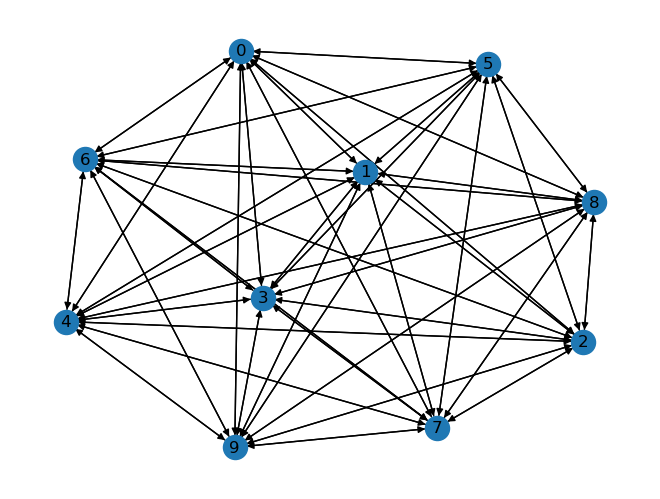

In [29]:
# Initialize a directed graph
G = nx.DiGraph()

# Adding edges to the graph from the TSP data
# Each city is connected to the next city with an edge representing the distance between them
for index, row in TSP_data.iterrows():
    G.add_edge(str(row['current_city']), str(row['next_city']), length=row['distance'])
    G.add_edge(str(row['next_city']), str(row['current_city']), length=row['distance'])

# Drawing the graph with city labels
# This visualization helps in understanding the connections between cities
nx.draw(G, with_labels=True)
plt.show()

In [30]:
# Define the number of cities in the TSP problem
n = 10

# Initialize an n x n adjacency matrix with zeros
# This matrix will store the distances between cities
adjacency_mat = np.zeros((n, n))

# Populate the adjacency matrix with distances from the TSP data
# Each entry (i, j) in the matrix represents the distance from city i to city j
for index, row in TSP_data.iterrows():
    adjacency_mat[row['current_city'], row['next_city']] = row['distance']
    adjacency_mat[row['next_city'], row['current_city']] = row['distance']

# Display the adjacency matrix
print("Adjacency Matrix for TSP Problem:\n", adjacency_mat)

Adjacency Matrix for TSP Problem:
 [[ 0.  3.  1.  9. 12.  6.  7. 11.  7.  9.]
 [ 3.  0.  7. 10.  7.  2.  8.  3.  4.  2.]
 [ 1.  7.  0.  5.  8.  4.  6. 10.  4.  9.]
 [ 9. 10.  5.  0.  8. 12.  2.  3.  5. 13.]
 [12.  7.  8.  8.  0.  8.  9.  1.  5. 10.]
 [ 6.  2.  4. 12.  8.  0.  5. 11.  8.  1.]
 [ 7.  8.  6.  2.  9.  5.  0.  4.  5.  3.]
 [11.  3. 10.  3.  1. 11.  4.  0.  9.  2.]
 [ 7.  4.  4.  5.  5.  8.  5.  9.  0.  6.]
 [ 9.  2.  9. 13. 10.  1.  3.  2.  6.  0.]]


In [31]:
def route_dist(route, adjacency_mat):
    """
    Calculate the total distance of a given route based on the adjacency matrix.

    Parameters:
    route (list): A list of cities representing a route.
    adjacency_mat (numpy.ndarray): An adjacency matrix where each element represents the distance between cities.

    Returns:
    float: The total distance of the route.
    """
    total_distance = 0
    # Summing the distances between consecutive cities in the route
    for i in range(len(route) - 1):
        total_distance += adjacency_mat[route[i], route[i+1]]

    return total_distance

In [32]:
def simulated_annealing(cost_function, adjacency_matrix, initial_temperature, total_iterations):
    """
    Perform simulated annealing to find an approximate solution to the TSP problem.

    Parameters:
    cost_function (function): A function to calculate the route distance.
    adjacency_matrix (numpy.ndarray): An adjacency matrix representing distances between cities.
    initial_temperature (float): The initial temperature for simulated annealing.
    total_iterations (int): The number of iterations for the annealing process.

    Returns:
    tuple: Final route, its total distance, temperature array, and cost array over iterations.
    """
    temperature_array = []
    cost_array = []

    # Initialize a trivial route and evaluate its cost
    current_route = np.arange(10)  # 10 should be replaced with the number of cities if it changes
    np.random.shuffle(current_route)
    current_route = np.append(current_route, current_route[0])
    current_route_cost = cost_function(current_route, adjacency_matrix)

    # Main simulated annealing loop
    for iteration in range(total_iterations):
        # Generate a new candidate route and evaluate its cost
        candidate_route = np.arange(10)  # 10 should be replaced as above
        np.random.shuffle(candidate_route)
        candidate_route = np.append(candidate_route, candidate_route[0])
        candidate_route_cost = cost_function(candidate_route, adjacency_matrix)

        # Update the current route if the candidate route is better
        if candidate_route_cost < current_route_cost:
            current_route = candidate_route
            current_route_cost = candidate_route_cost

        # Metropolis acceptance criterion
        temperature = initial_temperature / (iteration + 1)
        metropolis_criterion = np.exp(-(candidate_route_cost - current_route_cost) / temperature)
        if metropolis_criterion > np.random.uniform():
            current_route = candidate_route
            current_route_cost = candidate_route_cost

        temperature_array.append(temperature)
        cost_array.append(current_route_cost)

        # Optional: Print the route and its cost every 500 iterations
        if (iteration + 1) % 500 == 0:
            print(f'Iteration: {iteration + 1:6d} \t Route: {current_route} \t Distance: {current_route_cost}')

    return current_route, current_route_cost, temperature_array, cost_array

In [33]:
# Execute the simulated annealing algorithm
# Parameters:
# - route_dist: The function to calculate the distance of a route
# - adjacency_mat: The adjacency matrix representing distances between cities
# - 500: Initial temperature for the simulated annealing
# - 50000: Total number of iterations for the annealing process
solution_route, solution_evaluation, temperature_array, cost_array = simulated_annealing(
    route_dist, 
    adjacency_mat, 
    initial_temperature=500, 
    total_iterations=50000
)

# solution_route: Final route obtained from simulated annealing
# solution_evaluation: Total distance of the final route
# temperature_array: Array of temperature values during the annealing process
# cost_array: Array of cost (distance) values during the annealing process

Iteration:    500 	 Route: [4 8 5 9 6 2 0 1 3 7 4] 	 Distance: 41.0
Iteration:   1000 	 Route: [5 1 8 4 7 3 0 2 6 9 5] 	 Distance: 35.0
Iteration:   1500 	 Route: [3 2 0 5 1 9 6 8 4 7 3] 	 Distance: 33.0
Iteration:   2000 	 Route: [3 2 0 5 1 9 6 8 4 7 3] 	 Distance: 33.0
Iteration:   2500 	 Route: [8 2 0 5 9 1 6 3 7 4 8] 	 Distance: 33.0
Iteration:   3000 	 Route: [1 0 2 3 8 4 7 6 5 9 1] 	 Distance: 32.0
Iteration:   3500 	 Route: [1 0 2 3 8 4 7 6 5 9 1] 	 Distance: 32.0
Iteration:   4000 	 Route: [1 0 2 3 8 4 7 6 5 9 1] 	 Distance: 32.0
Iteration:   4500 	 Route: [1 0 2 3 8 4 7 6 5 9 1] 	 Distance: 32.0
Iteration:   5000 	 Route: [1 0 2 3 8 4 7 6 5 9 1] 	 Distance: 32.0
Iteration:   5500 	 Route: [1 0 2 3 8 4 7 6 5 9 1] 	 Distance: 32.0
Iteration:   6000 	 Route: [7 4 8 2 0 5 1 9 6 3 7] 	 Distance: 29.0
Iteration:   6500 	 Route: [7 4 8 2 0 5 1 9 6 3 7] 	 Distance: 29.0
Iteration:   7000 	 Route: [7 4 8 2 0 5 1 9 6 3 7] 	 Distance: 29.0
Iteration:   7500 	 Route: [7 4 8 2 0 5 1 9 6 3 

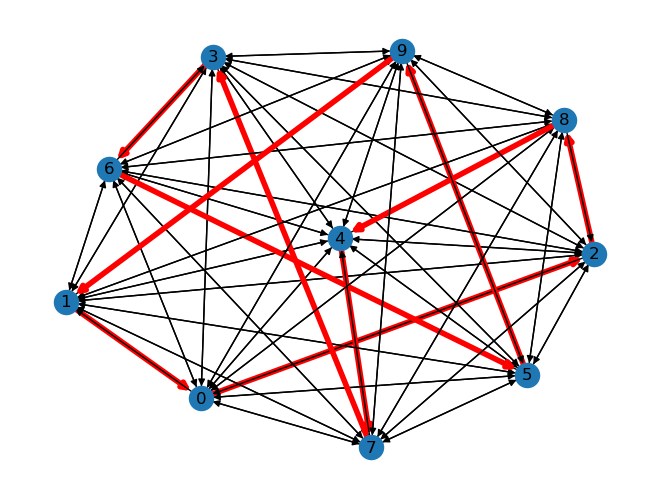

In [34]:
# Initialize a directed graph for visualizing the TSP routes
G = nx.DiGraph()

# Adding edges for each pair of cities in TSP data with default properties
# 'k' color (black) indicates the original paths between cities
for index, row in TSP_data.iterrows():
    G.add_edge(str(row['current_city']), str(row['next_city']), color='k', length=row['distance'], width=1)
    G.add_edge(str(row['next_city']), str(row['current_city']), color='k', length=row['distance'], width=1)

# Highlighting the solution route with different properties
# 'r' color (red) and increased width indicates the path of the solution
for i in range(len(solution_route) - 1):
    G.add_edge(str(solution_route[i]), str(solution_route[i + 1]), color='r', length=adjacency_mat[solution_route[i + 1], solution_route[i]], width=4)

# Extracting edge colors and widths for visualization
edge_colors = [G[u][v]['color'] for u, v in G.edges]
edge_widths = [G[u][v]['width'] for u, v in G.edges]

# Drawing the graph with the specified edge colors and widths
nx.draw(G, edge_color=edge_colors, width=edge_widths, with_labels=True)
plt.show()

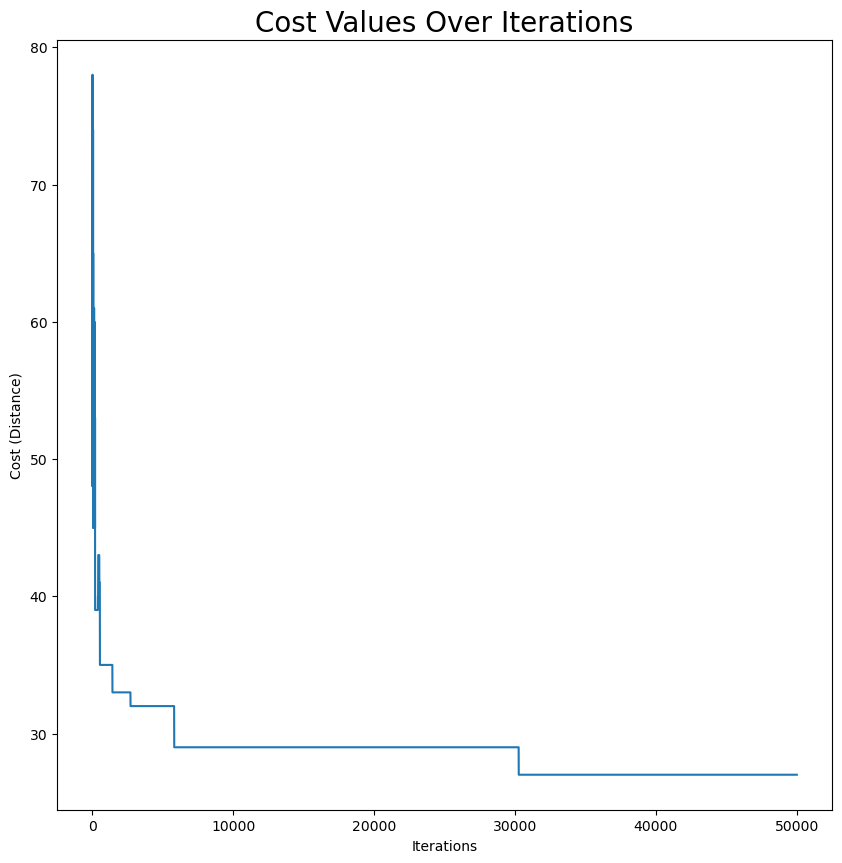

In [35]:
# Create a figure for plotting
plt.figure(figsize=(10, 10))

# Plotting the cost values over iterations
# This graph shows how the cost (distance) changes as the simulated annealing algorithm progresses
plt.plot(cost_array)  # Assuming 'cost_arr' was renamed to 'cost_array' in earlier cells for consistency

# Setting the axis labels and plot title for better understanding
plt.xlabel('Iterations')
plt.ylabel('Cost (Distance)')
plt.title('Cost Values Over Iterations', fontsize=20)

# Display the plot
plt.show()

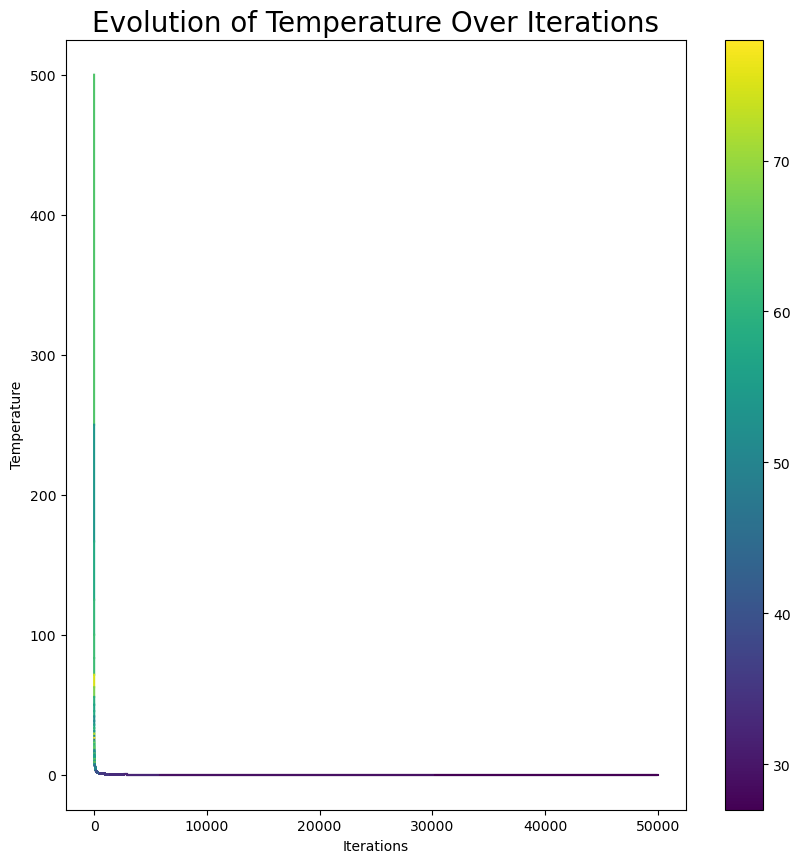

In [36]:
# Normalizing the cost values for color mapping
cost_normalization = colors.Normalize(vmin=np.min(cost_array), vmax=np.max(cost_array))
color_map = cm.viridis

# Creating a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting the temperature evolution over iterations
# The color of the line indicates the cost at each iteration
for i in range(len(temperature_array) - 1):
    ax.plot([i, i+1], temperature_array[i:i+2], c=color_map(cost_normalization(cost_array[i])))

# Setting the axis labels and plot title
ax.set_xlabel('Iterations')
ax.set_ylabel('Temperature')
ax.set_title('Evolution of Temperature Over Iterations', fontsize=20)

# Adding a colorbar to represent the cost values
plt.colorbar(cm.ScalarMappable(norm=cost_normalization, cmap=color_map), ax=ax)    
plt.show()

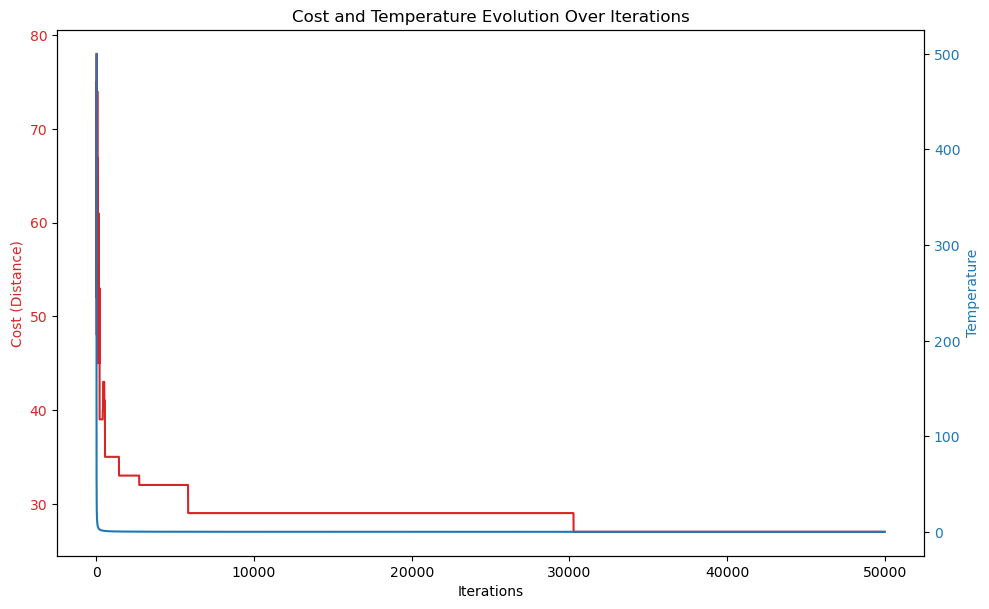

In [37]:
# Enhanced Visualization Code Sample
import matplotlib.pyplot as plt

# Assuming 'cost_array' contains the cost values and 'temperature_array' the temperature values
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost (Distance)', color=color)
ax1.plot(cost_array, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  
ax2.plot(temperature_array, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure the right y-label is not clipped
plt.title('Cost and Temperature Evolution Over Iterations')
plt.show()